In [1]:
## Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Explore data

In [2]:
data=pd.read_table('train.tsv')

In [3]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


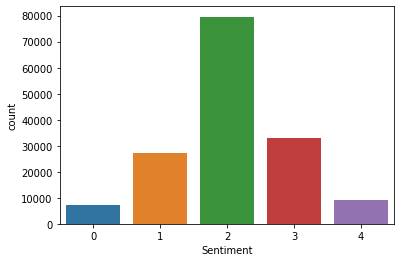

In [4]:
sns.countplot('Sentiment', data = data)
plt.show()

In [5]:
#The sentiment labels are:

# 0 - negative; 1 - somewhat negative; 2 - neutral; 3 - somewhat positive; 4 - positive

In [6]:
# let us check the phrase of the first data of the dataset
data.iloc[0]['Phrase']

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [7]:
# let us check the phrase of the second data of the dataset
data.iloc[1]['Phrase']

'A series of escapades demonstrating the adage that what is good for the goose'

# Exploratory Data Analysis

In [8]:
def get_polarity(data):
        # set sentiment
        if data['Sentiment'] == 0:
            return 'negative'
        elif data['Sentiment'] == 1:
            return 'somewhat negative'
        elif data['Sentiment']==2:
            return 'neuteral'
        elif data['Sentiment']==3:
            return 'somewhat positive'
        else:
            return 'positive'

In [9]:
data['Polarity'] = data.apply(get_polarity,axis=1)

In [10]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment,Polarity
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative
1,2,1,A series of escapades demonstrating the adage ...,2,neuteral
2,3,1,A series,2,neuteral
3,4,1,A,2,neuteral
4,5,1,series,2,neuteral


In [11]:
data.tail()

,PhraseId,SentenceId,Phrase,Sentiment,Polarity
156055,156056,8544,Hearst 's,2,neuteral
156056,156057,8544,forced avuncular chortles,1,somewhat negative
156057,156058,8544,avuncular chortles,3,somewhat positive
156058,156059,8544,avuncular,2,neuteral
156059,156060,8544,chortles,2,neuteral


In [12]:
print(data.Polarity.value_counts())

neuteral             79582
somewhat positive    32927
somewhat negative    27273
positive              9206
negative              7072
Name: Polarity, dtype: int64


Text(0.5, 0, 'Sentiment expressed in Reviews')

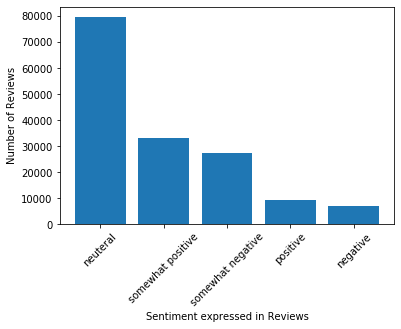

In [13]:
Index = [1,2,3,4,5]
plt.bar(Index,data.Polarity.value_counts())
plt.xticks(Index,['neuteral','somewhat positive','somewhat negative','positive','negative'],rotation=45)
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment expressed in Reviews')

In [14]:
data.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
Polarity      0
dtype: int64

# Preprocess data

In [15]:
X = data['Phrase']
y = data['Polarity']

In [16]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [17]:
print(X_train.shape)
print(X_test.shape)

(109242,)
(46818,)


# Create CountVectorizer and TfidfVectorizer for data

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
from nltk.tokenize import RegexpTokenizer

In [20]:
# tokenizer to remove unwanted elements from out data like symbols and numbers

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

In [21]:
count_train = cv.fit_transform(X_train)
count_test = cv.transform(X_test)

In [22]:
from sklearn.naive_bayes import MultinomialNB

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes

clf = MultinomialNB().fit(count_train, y_train)
predicted= clf.predict(count_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6050237088299372


In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted)
print(cm)

[[  568   472     9  1000    70]
 [  185 18619   197  2168  2647]
 [    3   429   782    41  1415]
 [  538  3828    37  3412   462]
 [   15  3918   667   391  4945]]


In [24]:
from sklearn.metrics import f1_score

In [25]:
f1_score(y_test,clf.predict(count_test),average = None)

array([0.33138856, 0.72898477, 0.35855112, 0.44633397, 0.50783055])

In [26]:
# Create Tfidfvectorizer 

from sklearn.feature_extraction.text import TfidfVectorizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

tf=TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

In [27]:
tfidf_train = tf.fit_transform(X_train)
tfidf_test = tf.transform(X_test)

In [28]:
# Model Generation Using Multinomial Naive Bayes

clf = MultinomialNB().fit(tfidf_train, y_train)

predicted= clf.predict(tfidf_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5863556751676705


In [29]:
cm = confusion_matrix(y_test, predicted)
print(cm)

[[   72  1118     1   894    34]
 [    7 21099    20  1073  1617]
 [    0   933   143    16  1578]
 [   47  5778     0  2212   240]
 [    0  5800    80   130  3926]]


In [30]:
f1_score(y_test,clf.predict(tfidf_test),average = None)

array([0.06414254, 0.7207912 , 0.09814688, 0.35105539, 0.45306099])

we got a classification rate of 58.63% using TF-IDF features, which is not considered as good accuracy.we need to used other model and check the accuracy 

In [31]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression().fit(count_train, y_train)

predicted = lm.predict(count_test)

print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Regression Accuracy: 0.6375752915545303


C:\Users\DIPAK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
cm = confusion_matrix(y_test, predicted)
print(cm)

[[  590   482     6   978    63]
 [   85 20582    88  1370  1691]
 [    1   355   917    37  1360]
 [  449  4341    33  3112   342]
 [   15  4369   635   268  4649]]


# Test the model by using 'test.tsv dataset'

In [33]:
## test for logistic regression model in countvectorize
test = pd.read_table('test.tsv')

test_set = test['Phrase']
count_test = cv.transform(test_set)

In [34]:
predictions = lm.predict(count_test)
final_answer = pd.DataFrame({'PhraseId':test['PhraseId'],'Sentiment':predictions})
final_answer.to_csv('submit.csv', index = False)

In [35]:
dip = pd.read_csv('submit.csv')

In [36]:
dip.head()

,PhraseId,Sentiment
0,156061,somewhat positive
1,156062,somewhat positive
2,156063,neuteral
3,156064,somewhat positive
4,156065,somewhat positive


In [38]:
rev = ['newer']
pha_vec = cv.transform(rev)
clf.predict(pha_vec)

array(['neuteral'], dtype='<U17')